In [3]:
!pip3 install pandas sklearn ipympl

In [2]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("dataset.csv")
data

,PaperID,PaperDiscipline,StudentLevel,StudentGender,SpeakerStatus,PaperType,CharacterTypes,CitationAuthority,CitationControversy,CitationHedged,...,ConfidenceLow,ExpertVocabulary,InformationComparison,InformationQuantities,MethodsResultsDiscussion,PurposePlan,ReaderDirectedMetadiscourse,ReaderDirectedMetadiscourseFP,Reasoning,id
0,BIO.G0.01.1,Biology,Final Year Undergraduate,F,NS,Report,1.200,0.097,0.065,0.000,...,0.016,5.481,0.908,0.373,0.016,0.324,1.946,0.000,1.330,1
1,BIO.G0.02.1,Biology,Final Year Undergraduate,M,NS,Report,2.408,0.382,0.059,0.059,...,0.029,7.076,0.763,0.646,0.352,0.382,2.349,0.029,1.615,2
2,BIO.G0.02.2,Biology,Final Year Undergraduate,M,NS,Report,2.137,0.450,0.000,0.000,...,0.000,10.124,1.575,0.562,0.112,0.000,1.800,0.000,1.575,3
3,BIO.G0.02.3,Biology,Final Year Undergraduate,M,NS,Report,0.761,0.457,0.761,0.000,...,0.000,10.654,1.826,0.000,0.304,0.304,1.674,0.000,3.196,4
4,BIO.G0.02.4,Biology,Final Year Undergraduate,M,NS,Report,0.546,0.137,0.000,0.000,...,0.137,12.432,2.049,0.273,0.137,0.683,3.279,0.000,5.055,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,SOC.G3.09.2,Sociology,Third Year Graduate,M,NS,Essay,1.070,0.089,0.000,0.000,...,0.000,6.244,0.535,0.089,0.089,1.427,2.855,0.000,1.963,824
824,SOC.G3.10.1,Sociology,Third Year Graduate,F,NNS,Report,2.758,0.247,0.329,0.041,...,0.000,5.599,0.494,1.153,0.041,0.247,1.770,0.124,1.606,825
825,SOC.G3.10.2,Sociology,Third Year Graduate,F,NNS,Report,2.663,0.000,0.350,0.000,...,0.000,8.549,0.771,1.121,0.070,0.701,2.067,0.035,1.927,826
826,SOC.G3.10.3,Sociology,Third Year Graduate,F,NNS,Critique,2.470,0.024,0.384,0.000,...,0.024,6.139,0.815,1.127,0.000,0.360,1.918,0.120,2.374,827


In [4]:
set(data["PaperDiscipline"])

{'Biology',
 'Civil and Environmental Engineering',
 'Classical Studies',
 'Economics',
 'Education',
 'English',
 'History',
 'Industrial and Operational Engineering',
 'Linguistics',
 'Mechanical Engineering',
 'Natural Resources',
 'Nursing',
 'Philosophy',
 'Physics',
 'Political Science',
 'Psychology',
 'Sociology'}

In [22]:
# Take everything quantitative; this will be our input
feature_names = ["CharacterTypes", 
    # "CitationAuthority", 
    # "CitationControversy", 
    "CitationHedged", 
    "CitationNeutral", 
    "ConfidenceHedged", 
    # "ConfidenceHigh", 
    "ConfidenceLow", 
    "ExpertVocabulary", 
    "InformationComparison", 
    "InformationQuantities", 
    "MethodsResultsDiscussion", 
    "PurposePlan", 
    "ReaderDirectedMetadiscourse", 
    # "ReaderDirectedMetadiscourseFP", 
    "Reasoning"
]

# remove_categories = ["English", "History", "Political Science", "Sociology"]
# remove_categories = ["Economics", "Classical Studies", "Physics", "History", "Civil and Environmental Engineering",
                    #  "Mechanical Engineering", "Linguistics"]
remove_categories = []

# Now go through and remove rows with these
for rem in remove_categories:
    data = data[data["PaperDiscipline"] != rem]

categories = {
    "Sciences": ["Biology", "Economics", "Natural Resources", "Nursing", "Physics"],
    "Engineering": ["Civil and Environmental Engineering", "Industrial and Operational Engineering", "Mechanical Engineering"],
    "Humanities": ["Classical Studies", "Education", "English", "History", "Linguistics", "Political Science", "Psychology", "Sociology", "Philosophy"]
}
categories_flip = {}
for i, j in categories.items():
    for n in j:
        categories_flip[n] = i

use_thing = "Category"
data['Category'] = pd.Series([categories_flip[row["PaperDiscipline"]] for i, row in data.iterrows()], index=data.index)
input_train = data[feature_names]
# Take discipline and encode each letter
disciplines = set(data[use_thing])
discipline_to = {j: i for i, j in enumerate(disciplines)}
discipline_from = {i: j for i, j in enumerate(disciplines)}
output_train = []

for discipline in data[use_thing]:
    output_train.append(discipline_to[discipline])

input_train, output_train

(     CharacterTypes  CitationHedged  CitationNeutral  ConfidenceHedged  \
 0             1.200           0.000            0.097             0.762   
 1             2.408           0.059            0.088             1.028   
 2             2.137           0.000            0.112             1.462   
 3             0.761           0.000            0.000             1.674   
 4             0.546           0.000            0.000             1.913   
 ..              ...             ...              ...               ...   
 823           1.070           0.000            0.089             1.070   
 824           2.758           0.041            0.165             0.535   
 825           2.663           0.000            0.175             0.911   
 826           2.470           0.000            0.144             0.887   
 827           3.183           0.021            0.107             0.427   
 
      ConfidenceLow  ExpertVocabulary  InformationComparison  \
 0            0.016             5.

In [23]:
data["PaperDiscipline"].value_counts()

PaperDiscipline
Psychology                                103
English                                    98
Sociology                                  72
Biology                                    67
Natural Resources                          62
Political Science                          62
Education                                  46
Philosophy                                 44
Industrial and Operational Engineering     42
Nursing                                    42
Linguistics                                41
Mechanical Engineering                     32
Civil and Environmental Engineering        31
History                                    26
Economics                                  25
Physics                                    21
Classical Studies                          14
Name: count, dtype: int64

In [24]:
data["Category"].value_counts()

Category
Humanities     506
Sciences       217
Engineering    105
Name: count, dtype: int64

In [25]:
data[use_thing].value_counts()

Category
Humanities     506
Sciences       217
Engineering    105
Name: count, dtype: int64

In [26]:
def calc_acc(output, pred):
    score = 0
    for out, pred in zip(output, pred):
        if pred == out:
            score += 1

    score /= len(output)
    return score

In [27]:
%matplotlib widget
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn import tree

# Randomly shuffle + place into testing and training
# pca = PCA(n_components = 16)
# pca.fit(input_train)
X = np.array(input_train)
y = np.array(output_train)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=197)

clf = SGDClassifier(max_iter=10000, penalty="l2").fit(X_train, y_train)
clf_2 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
clf_3 = KNeighborsClassifier().fit(X_train, y_train)
clf_4 = DecisionTreeClassifier(max_depth=100).fit(X_train, y_train)

# See how well our projection worked
# predicted = clf.predict(X_train)
# predicted_2 = clf_2.predict(X_train)
# predicted_3 = clf_3.predict(X_train)

print(F"""Regression outputs ({len(X_train)} training, {len(X_test)} testing):
\tSGD: {clf.score(X_test, y_test)*100}%
\tLogReg: {clf_2.score(X_test, y_test)*100}%
\tKNeighbors: {clf_3.score(X_test, y_test)*100}%
\tDecision Tree: {clf_4.score(X_test, y_test)*100}%""")

[[1.2   0.    0.097 ... 0.324 1.946 1.33 ]
 [2.408 0.059 0.088 ... 0.382 2.349 1.615]
 [2.137 0.    0.112 ... 0.    1.8   1.575]
 ...
 [2.663 0.    0.175 ... 0.701 2.067 1.927]
 [2.47  0.    0.144 ... 0.36  1.918 2.374]
 [3.183 0.021 0.107 ... 0.94  1.923 1.474]]
Regression outputs (745 training, 83 testing):
	SGD: 83.13253012048193%
	LogReg: 84.33734939759037%
	KNeighbors: 69.87951807228916%
	Decision Tree: 57.831325301204814%


In [7]:
print(tree.export_text(clf_4))

|--- feature_11 <= 0.05
|   |--- feature_14 <= 0.26
|   |   |--- feature_12 <= 0.23
|   |   |   |--- feature_8 <= 7.91
|   |   |   |   |--- feature_10 <= 1.52
|   |   |   |   |   |--- class: 15
|   |   |   |   |--- feature_10 >  1.52
|   |   |   |   |   |--- class: 12
|   |   |   |--- feature_8 >  7.91
|   |   |   |   |--- feature_8 <= 8.79
|   |   |   |   |   |--- class: 13
|   |   |   |   |--- feature_8 >  8.79
|   |   |   |   |   |--- class: 11
|   |   |--- feature_12 >  0.23
|   |   |   |--- feature_8 <= 3.94
|   |   |   |   |--- feature_15 <= 1.96
|   |   |   |   |   |--- class: 15
|   |   |   |   |--- feature_15 >  1.96
|   |   |   |   |   |--- class: 13
|   |   |   |--- feature_8 >  3.94
|   |   |   |   |--- feature_2 <= 0.29
|   |   |   |   |   |--- class: 15
|   |   |   |   |--- feature_2 >  0.29
|   |   |   |   |   |--- class: 9
|   |--- feature_14 >  0.26
|   |   |--- feature_5 <= 0.91
|   |   |   |--- feature_5 <= 0.83
|   |   |   |   |--- feature_10 <= 0.32
|   |   |   |  

KeyboardInterrupt: 

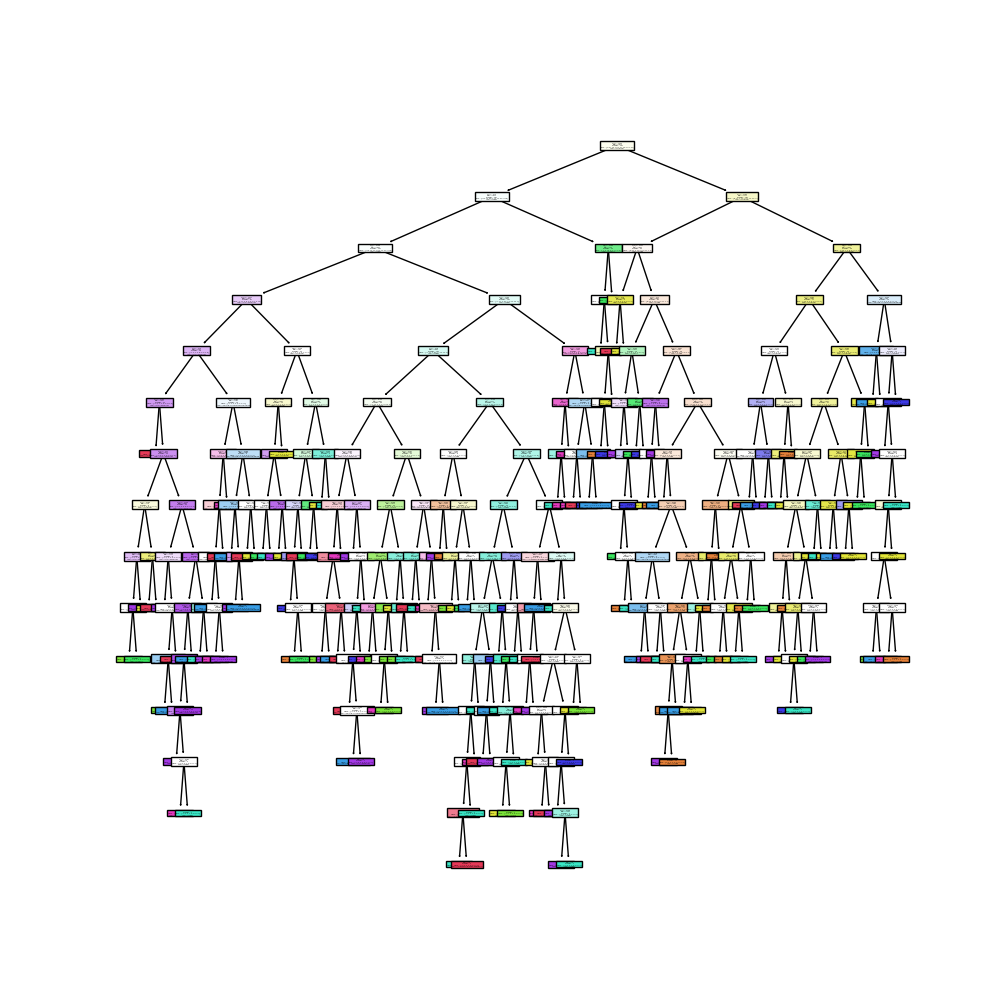

In [91]:
# DOT data
fig = plt.figure()
_ = tree.plot_tree(clf_4, 
                #    feature_names=iris.feature_names,  
                   class_names=list(disciplines),
                   filled=True)
fig.savefig("decision_tree.png")

In [28]:
clf_2.coef_

array([[-0.3895507 , -0.43343721,  0.06264209, -0.0928425 , -0.39394418,
        -0.0144268 , -0.15419062,  0.28253846,  1.50114575,  0.67327009,
        -0.4513152 , -0.32948363],
       [-0.03187489, -0.24605292, -1.35561909,  0.40503251,  0.14521449,
         0.07907184,  0.08371972, -0.04715173,  0.05470565,  0.07500085,
        -0.453295  ,  0.16557849],
       [ 0.42142559,  0.67949013,  1.292977  , -0.31219001,  0.24872969,
        -0.06464504,  0.07047091, -0.23538673, -1.5558514 , -0.74827094,
         0.9046102 ,  0.16390514]])

In [46]:
odds = np.exp(clf_2.coef_).transpose()

pd.DataFrame(odds, 
             feature_names, 
             columns=discipline_to.keys())\
            .sort_values(by='Engineering', ascending=False)

,Engineering,Sciences,Humanities
MethodsResultsDiscussion,4.486827,1.056230,0.211010
PurposePlan,1.960638,1.077885,0.473184
InformationQuantities,1.326493,0.953943,0.790265
CitationNeutral,1.064646,0.257788,3.643617
ExpertVocabulary,0.985677,1.082282,0.937400
ConfidenceHedged,0.911337,1.499351,0.731842
InformationComparison,0.857109,1.087324,1.073013
Reasoning,0.719295,1.180076,1.178103
CharacterTypes,0.677361,0.968628,1.524133
ConfidenceLow,0.674392,1.156288,1.282395


In [28]:
!pip3 install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 162.5 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.9 kB 558.5 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


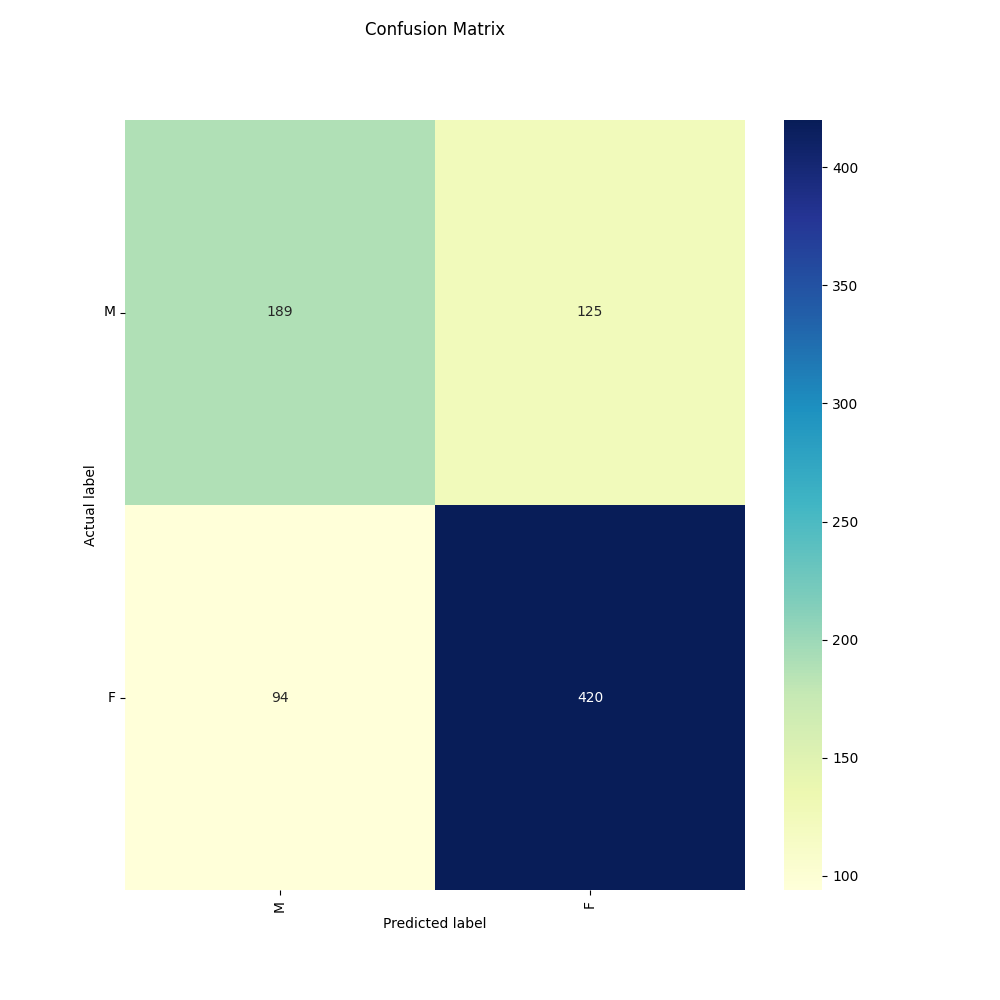

In [480]:
import seaborn as sns
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10,10)

class_names = [d[:7] + ("..." if len(d) > 9 else "") for d in disciplines] # name of classes
plt.clf()
fig, ax = plt.subplots()

cnf_matrix = metrics.confusion_matrix(y, clf_3.predict(X))
tick_marks = [x + 0.5 for x in range(len(class_names))]
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.xticks(tick_marks, class_names, rotation = 90)
plt.yticks(tick_marks, class_names, rotation = 0)
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("confusion_matrix_gender.png")

In [508]:
feature_list = list(set(feature_names))
comp = []
for i, j in discipline_to.items():
    ind = np.where(y == j)
    comp.append(list(np.average(X[ind], axis=0)))

# Take the two values + compare them
i = 0
for (m, f) in zip(*comp):
    print(F"Category {feature_list[i]}: {m} (M) vs {f} (F)")
    i += 1

Category CitationAuthority: 1.3550000000000002 (M) vs 2.3410466926070046 (F)
Category ExpertVocabulary: 0.12019745222929933 (M) vs 0.13048249027237357 (F)
Category Reasoning: 0.11145541401273878 (M) vs 0.1056128404669261 (F)
Category CitationHedged: 0.011133757961783439 (M) vs 0.01710116731517509 (F)
Category ConfidenceLow: 0.1271178343949045 (M) vs 0.16424513618677059 (F)
Category ReaderDirectedMetadiscourse: 0.788184713375796 (M) vs 0.756112840466927 (F)
Category ReaderDirectedMetadiscourseFP: 0.5173598726114652 (M) vs 0.47623735408560314 (F)
Category MethodsResultsDiscussion: 0.008257961783439492 (M) vs 0.012155642023346297 (F)
Category ConfidenceHedged: 6.767515923566875 (M) vs 6.305142023346303 (F)
Category ConfidenceHigh: 1.097831210191083 (M) vs 1.0844007782101157 (F)
Category CitationNeutral: 0.9377898089171971 (M) vs 0.7894299610894944 (F)
Category InformationQuantities: 0.25425477707006394 (M) vs 0.22887548638132296 (F)
Category PurposePlan: 0.5418471337579618 (M) vs 0.545190

: 

ValueError: n_features must be equal to 2. Got 16 instead.

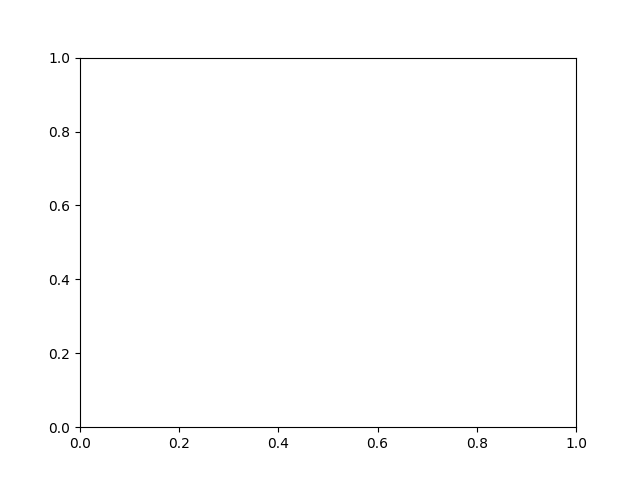

In [11]:
plt.clf()
ax = plt.figure().add_subplot()

DecisionBoundaryDisplay.from_estimator(
    clf_2,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

for i, j in discipline_to.items():
    ind = np.where(y == j)
    ax.scatter(*zip(*X[ind]), label=i, c='')

plt.legend()

plt.show()

predicted_2 = clf_2.predict(X_train)
[x for x in zip(predicted_2, y_train)]